# Important Questions!!!!
What is optimizer.zero_grad() actually doing?
What is loss.backward where is it being stored?
How does optimizer.step() actually work

Multivariable case
How do we find the actual gradient is it through partial derivatives and set it to 0?

Vector case
How is the vector case the same as the multivariable case, if you expand out f(x) for the vector case it isn't the same as the multivariate case?


# NOTES!!!!!!
Calculates the loss function to actually generate the computational graph which does the derivative of the functions

In [1]:
%pylab inline
import torch as th
import torch.optim as optim
import torch.nn as nn
import numpy as np

def plot_loss_curve(loss_curve):
        plt.plot(list(range(len(loss_curve))), loss_curve)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# set up model with parameter and loss function

def f(x):
    print('X is:')
    print(x.data)
    #print(2*x*x + 3*x - 4)
    #return 2*x*x + 3*x - 4
    print('Here')
    print(2*x**2 + 2*x)
    return 2*x**2 + 2*x

class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        #x = th.tensor(np.random.random())
        x = th.tensor(2.0)
        print('Init: {}'.format(x))
    #generate random point
        self.x = nn.Parameter(x)
    
    def loss(self):
        return f(self.x)

In [3]:
model = MyModel() #model instance
lr = 0.1 # our learning rate
loss_curve = []
optimizer = optim.SGD(model.parameters(), lr=lr)
print('x ', model.x)
num_epochs = 2
for epoch in range(num_epochs):
    print('Epoch {}'.format(epoch))
    optimizer.zero_grad() #zero out gradients to prevent gradients
    #from carrying over into other iterations
    loss = model.loss() #compute loss
    loss.backward() #compute gradient with respect to loss function
    print('Grad at x', model.x.grad)
    loss_curve.append(loss.item())
    optimizer.step() #use gradient descent to adjust value of
    #parameters in model
print('Our final x^* is ', model.x.data)

Init: 2.0
x  Parameter containing:
tensor(2., requires_grad=True)
Epoch 0
X is:
tensor(2.)
Here
tensor(12., grad_fn=<AddBackward0>)
Grad at x tensor(10.)
Epoch 1
X is:
tensor(1.)
Here
tensor(4., grad_fn=<AddBackward0>)
Grad at x tensor(6.)
Our final x^* is  tensor(0.4000)


Text(0.5, 1.0, 'Loss curve')

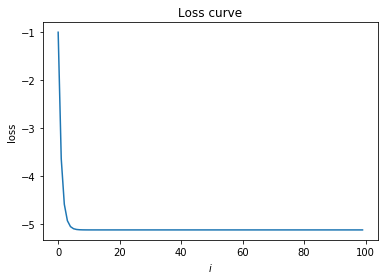

In [42]:
plot_loss_curve(loss_curve)
plt.xlabel('$i$')
plt.ylabel('loss')
plt.title('Loss curve')

# Exercises

In [38]:
# Exercise 1
def loss_function(x):
    #return -((x[0]**2 + x[1]**2 + x[0]*x[1])**2) - 4
    return ((x[0]**2 + x[1]**2 + x[0]*x[1])**2) + 4
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        x = th.tensor(np.random.random(2)) # generate two 
        #random points
        self.x = nn.Parameter(x)
        
    def loss(self):
        return loss_function(self.x)

model = MyModel() #model instance
lr = 0.05 # our learning rate
loss_curve = []
optimizer = optim.SGD(model.parameters(), lr=lr)
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    #zero out gradients to prevent gradients from carrying over
    #into other iterations
    loss = model.loss() #compute loss
    loss.backward() #compute gradient with respect to loss function
    loss_curve.append(loss.item())
    optimizer.step() #use gradient descent to adjust value
    #of parameters in model

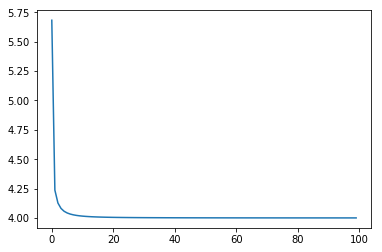

In [39]:
plot_loss_curve(loss_curve)

# Least Squares Problems

In [5]:
A = th.tensor([[2,1], [-1,1]], dtype=th.float32)
b = th.tensor([5,2], dtype=th.float32)

def loss_function(A, x, b):
    print('X value is {}'.format(x))
    return ( th.norm((A@x - b)) )**2
    #np.linalg.norm((A@x) - b, 2)
    
class LeastSquaresContainer(nn.Module):
    def __init__(self, n):
        super().__init__()
        x = th.tensor(np.random.random(n), dtype=th.float32)
        self.x = nn.Parameter(x)
    
    def loss(self, A, b):
        return loss_function(A, self.x, b)
    
def least_squares_approx(A, b, lr=0.01, epochs=200):
    m, n = A.shape
    estimator = LeastSquaresContainer(n=2)
    loss_curve = []
    optimizer = optim.SGD(estimator.parameters(), lr=lr)
    for epoch in range(epochs):
        optimizer.zero_grad()
        loss = estimator.loss(A,b)
        loss.backward()
        loss_curve.append(loss.item())
        optimizer.step()
        
    plot_loss_curve(loss_curve)
    return estimator

X value is Parameter containing:
tensor([0.9458, 0.4403], requires_grad=True)
X value is Parameter containing:
tensor([1.0024, 0.5438], requires_grad=True)
X value is Parameter containing:
tensor([1.0513, 0.6420], requires_grad=True)
X value is Parameter containing:
tensor([1.0933, 0.7353], requires_grad=True)
X value is Parameter containing:
tensor([1.1293, 0.8240], requires_grad=True)
X value is Parameter containing:
tensor([1.1599, 0.9085], requires_grad=True)
X value is Parameter containing:
tensor([1.1857, 0.9889], requires_grad=True)
X value is Parameter containing:
tensor([1.2074, 1.0657], requires_grad=True)
X value is Parameter containing:
tensor([1.2253, 1.1389], requires_grad=True)
X value is Parameter containing:
tensor([1.2400, 1.2088], requires_grad=True)
X value is Parameter containing:
tensor([1.2518, 1.2757], requires_grad=True)
X value is Parameter containing:
tensor([1.2611, 1.3396], requires_grad=True)
X value is Parameter containing:
tensor([1.2682, 1.4008], requir

X value is Parameter containing:
tensor([1.0009, 2.9970], requires_grad=True)
X value is Parameter containing:
tensor([1.0009, 2.9971], requires_grad=True)
X value is Parameter containing:
tensor([1.0008, 2.9972], requires_grad=True)
X value is Parameter containing:
tensor([1.0008, 2.9973], requires_grad=True)
X value is Parameter containing:
tensor([1.0008, 2.9974], requires_grad=True)
X value is Parameter containing:
tensor([1.0008, 2.9975], requires_grad=True)
X value is Parameter containing:
tensor([1.0007, 2.9976], requires_grad=True)


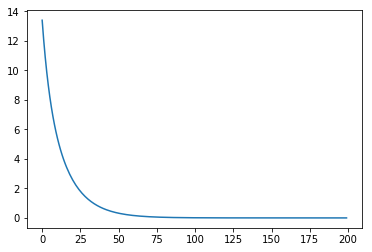

In [6]:
estimator = least_squares_approx(A, b)

In [7]:
estimator.x

Parameter containing:
tensor([1.0007, 2.9977], requires_grad=True)